# Análisis de los datos
En este notebook, se realiza un análisis  de los datos procesados obtenidos de los archivos de video y los ángulos calculados entre los keypoints. El objetivo es extraer información  y realizar una  detallada de los movimientos y posturas de los sujetos durante la ejecución de los gestos mediante gráficas.

**Objetivo**
* Genertar gráficos y diagramas que ilustran la distribución de los ángulos, comparaciones entre diferentes gestos y sujetos, y otros hallazgos relevantes del análisis.

**Entrada**
* ``Resultados/raw_pacientes.csv``: Contiene información detallada sobre cada grabación, incluyendo detalles del paciente, repeticiones, IDs de movimiento y posiciones de keypoints.
* ``Resultados/angles.csv``: Incluye los ángulos calculados entre keypoints, proporcionando datos clave para el análisis de la postura y el movimiento durante los gestos.
Estas son los archivos de salida de ``leer_dataset.ipynb``.

**Índice**
1. [Posición de un keypoint a través del tiempo](#1-posición-de-un-keypoint-a-través-del-tiempo)
2. [Número de instancias correctas e incorrectas](#2-numero-de-instancias-correctas-e-incorrectas)
3. [Sujetos por gesto](#3-sujetos-por-gesto)
4. [Sujetos por gesto y estado de ejecución](#4-sujetos-por-gesto-y-estado-de-ejecución)
5. [Ángulos a través del tiempo](#5-ángulos-a-través-de-tiempo)
****

In [1]:
# importar librerias necesarias
import pandas as pd # para manejar dataframes
# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_theme(style="darkgrid")

# Para ignorar los FutureWarning
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
# dataframe con toda la informacion recompilada de RawData
df_data = pd.read_csv('../Resultados/raw_pacientes.csv', dtype=object) # salida de leer_dataset.ipynb
df_data.head() # visualizacion de la cabecera

,SubjectID,GestureLabel,GestureName,RepetitionNumber,CorrectLabel,Position,JointName,3D_X,3D_Y,3D_Z
0,102,0,EFL,10,1,chair,SpineBase,-0.08088344,-0.2248836,2.661578
1,102,0,EFL,10,1,chair,SpineMid,-0.06806522,0.04492111,2.628779
2,102,0,EFL,10,1,chair,Neck,-0.055614,0.3082771,2.583972
3,102,0,EFL,10,1,chair,Head,-0.04478608,0.4328104,2.593495
4,102,0,EFL,10,1,chair,ShoulderLeft,-0.2232155,0.2021449,2.549825


In [3]:
# dataframe de los ángulos
df_angle = pd.read_csv('../Resultados/angles.csv', dtype=object) # salida de leer_dataset.ipynb
df_angle.head() # visualizacion de la cabecera

,SubjectID,GestureLabel,GestureName,RepetitionNumber,CorrectLabel,Position,ElbowAngleLeft,ElbowAngleRight,ShoulderAngleLeft,ShoulderAngleRight,...,WristAngleRight,HipAngleLeft,KneeAngleLeft,AnkleAngleLeft,HipAngleRight,KneeAngleRight,AnkleAngleRight,LeftArmAngle,RightArmAngle,ArmsTogetherAngle
0,102,0,EFL,10,1,chair,36.44586146663099,36.58291687676551,148.27614105302703,150.53811123082764,...,13.634312270223472,132.74736885456207,99.56124639218929,79.73953458503864,143.35081652592487,105.10812318675214,81.34597994198415,149.33708348514207,146.07795532474992,142.90575891699402
1,102,0,EFL,10,1,chair,36.5010084597306,37.02604552391138,148.25442855418083,150.51783789657492,...,1.784124732711049,132.64878553118385,99.67802077882095,80.37692204970729,143.68378984313233,105.21766880658822,81.3913676170385,149.40210334183834,145.9950276224907,143.00127892450536
2,102,0,EFL,10,1,chair,36.43168438879324,37.2391030085942,148.23315103311486,150.57762858764625,...,7.8326687295192405,132.68404270615113,99.9962477085274,82.60960487408927,143.63965367931073,105.2169081608279,81.3109063339218,149.36870986328643,145.90869635723627,142.96511730510454
3,102,0,EFL,10,1,chair,36.64533868158449,68.56460496839078,148.3234254205423,151.6665692650935,...,30.207149385156367,132.86412824000774,99.9987815536875,82.69105802841825,142.43444884386298,102.78360987027273,82.31388985482543,149.32774474559903,145.48098926033524,142.88051189199072
4,102,0,EFL,10,1,chair,36.704132641799276,67.5953917746566,148.25731235998916,156.53073930003194,...,48.424470020150785,132.908134251118,99.74598048701765,80.98221317988808,142.2871311693896,102.19797975645568,82.43299834618664,149.42044282563367,139.5648864326297,142.87638524849044


****
## 1. Posición de un keypoint a través del tiempo

Posición de la muñeca de una persona sana (102) vs un paciente (id: 206) realizando una flexión de hombro

In [4]:
# Función para crear la gráfica
def repetition_graph(df:pd.DataFrame, keyPoint:str, movementAxis:str):
    """
    Crea una gráfica en la que se representa la posición de un keypoint en función del tiempo (frame).
    Cada línea en la gráfica corresponde a una repetición distinta del gesto.

     La función realiza los siguientes pasos:
    1. Agrupa el DataFrame por el número de repetición (`RepetitionNumber`). Esto permite analizar
        cada repetición de manera individual.
    2. Itera a través de cada grupo (cada repetición). Dentro de cada grupo:
        - Extrae las posiciones del keypoint especificado (`keyPoint`) y de la base de la columna
        (`SpineBase`) en el eje de movimiento (`movementAxis`).
        - Normaliza las posiciones del keypoint restando las posiciones correspondientes de la base
        de la columna (`SpineBase`). Esto ajusta las posiciones del keypoint para centrarlas en
        relación con la base de la columna.
        - Grafica las posiciones normalizadas del keypoint a lo largo de los frames de la repetición.
    3. Configura las etiquetas del eje y y del eje x, así como los límites del eje y de la gráfica
    para mejorar la visualización.

    Parámetros
    --------
    df : DataFrame
        Datos de los keypoints, que debe incluir las columnas 'RepetitionNumber', 
               'JointName' y el eje de movimiento especificado.
    keyPoint : str
        Nombre del keypoint cuya posición se desea visualizar.
    movementAxis : str
        El eje del movimiento a analizar, puede ser '3D_X', '3D_Y', '3D_Z', '2D_X', o '2D_Y'.
    """
    groups = df.groupby("RepetitionNumber") # agrupa el dataframe según la repeticion
 
    for _ , group in groups:
        spinBase = group[group['JointName']=='SpineBase'][movementAxis] # cogemos tambien la posicion de la base de la columna para poder normalizar los datos
        WristRight = group[group['JointName']==keyPoint][movementAxis]
        normalize_values = WristRight.values - spinBase.values
        plt.plot(normalize_values)
        plt.ylabel("y-axis position")
        plt.xlabel("Frame number")
        plt.ylim((0, 0.9))


In [5]:
# Función para extraer la información correspondiente a un sujeto
def extraer_persona(df:pd.DataFrame, id:str, id_gesture:list[str]) -> pd.DataFrame:
    """
    Filtra y extrae datos de un DataFrame para obtener la posición de los keypoints correspondientes
    a un sujeto específico y un conjunto de gestos, solo cuando el sujeto está en la posición 'stand'.

    Parámetros
    ---------
    dfm : DataFrame
        Contiene los datos de los keypoints.
    id : str
        Identificador del sujeto cuyo movimiento se desea extraer.
    id_gesture : list[str]
        Lista de identificadores de gestos que se desean incluir en el DataFrame resultante.

    Return
    -------
    DataFrame filtrado que contiene únicamente los datos del sujeto especificado, para los gestos
    indicados y en la posición 'stand'.

    """
    conditions = (df['SubjectID'] == id) & (df['GestureLabel'].isin(id_gesture) )  & (df['Position'] =='stand')
    persona = df[conditions]
    persona = persona.apply(lambda x: pd.to_numeric(x, errors='ignore'))
    return persona

In [6]:
# seleccionamos a las dos personas
persona_sana = extraer_persona(df_data, '102', ['6'])
paciente_206 = extraer_persona(df_data, '206', ['6'])

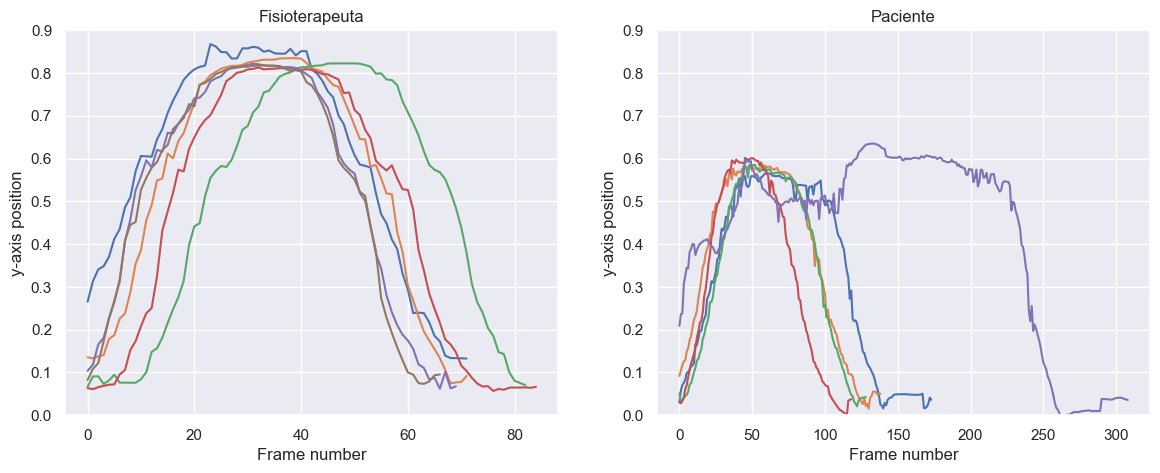

In [7]:
# creamos una gráfica para cada persona
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title('Fisioterapeuta')
repetition_graph(persona_sana, 'WristRight', '3D_Y')

plt.subplot(1, 2, 2)
plt.title('Paciente')
repetition_graph(paciente_206, 'WristRight', '3D_Y')

plt.show()

****
## 2. Numero de instancias correctas e incorrectas

*CorrectLabel*: Etiqueta que indica si el gesto ha sido clasificado como correcto. Tiene tres posibles valores: 1 (ejecutado correctamente), 2 (ejecutado incorrectamente) y 3 (ejecutado de manera deficiente)

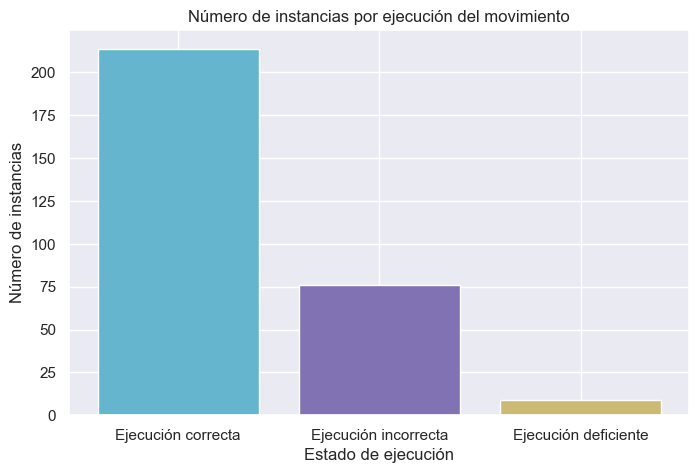

In [8]:
# Selecciona las columnas de interés y elimina duplicados
df_peque = df_data[['SubjectID', 'GestureLabel', 'CorrectLabel']].drop_duplicates().reset_index(drop=True)

# Agrupa el DataFrame y cuenta el número de gestos por cada categoría
df_peque = df_peque.groupby(['CorrectLabel']).count()

# Definición de las etiquetas y colores para la gráfica
x = ["Ejecución correcta", "Ejecución incorrecta", "Ejecución deficiente"]
color = ['c', 'm', 'y']

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(x, df_peque['GestureLabel'].values, color=color)

# Etiquetar los ejes
plt.ylabel('Número de instancias')
plt.xlabel('Estado de ejecución')
plt.title('Número de instancias por ejecución del movimiento')
plt.show()

****
## 3. Sujetos por gesto

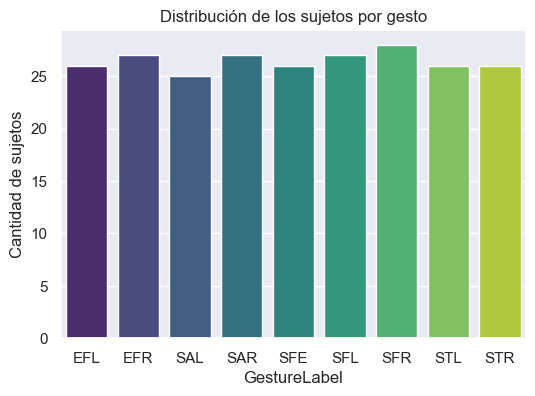

In [9]:
subject_per_gesture = df_data.groupby("GestureName")["SubjectID"].nunique().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="GestureName", y="SubjectID", data=subject_per_gesture, palette="viridis")

# Añadir título y etiquetas a los ejes
ax.set_title("Distribución de los sujetos por gesto")
ax.set_xlabel("GestureLabel")
ax.set_ylabel("Cantidad de sujetos")
plt.show()

*****
# 4. Sujetos por gesto y estado de ejecución

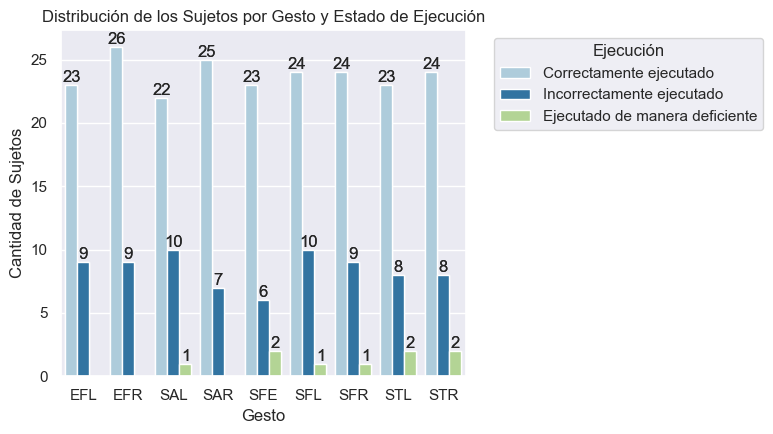

In [10]:
subject_count_per_gesture_correct = df_data.groupby(["GestureName", "CorrectLabel"])["SubjectID"].nunique().reset_index()

# Plotting
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x="GestureName", y="SubjectID", hue="CorrectLabel",
                 data=subject_count_per_gesture_correct, palette="Paired")

# Crear el gráfico de barras con la separación por estado de ejecución (hue)
ax = sns.barplot(x="GestureName", y="SubjectID", hue="CorrectLabel",
                 data=subject_count_per_gesture_correct, palette="Paired")

# Añadir título y etiquetas a los ejes
ax.set_title("Distribución de los Sujetos por Gesto y Estado de Ejecución")
ax.set_xlabel("Gesto")
ax.set_ylabel("Cantidad de Sujetos")

# Modificar las etiquetas de la leyenda
legend_labels = ['Correctamente ejecutado',
                 'Incorrectamente ejecutado',
                 'Ejecutado de manera deficiente']
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=legend_labels,
          title='Ejecución', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir etiquetas a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
    
plt.tight_layout()
plt.show()

****
## 5. Ángulos a través de tiempo

In [11]:
persona104_right = extraer_persona(df_angle, '104', ['1', '3', '5', '6'])

In [12]:
# Función para crear la gráfica
def angle_graph(df:pd.DataFrame, angle:str):
    """
    Crea gráficos de líneas para representar la variación de un ángulo específico a lo largo del tiempo
    (frames) para cada gesto. Cada subgráfico representa un gesto distinto.
    
    Parámetros
    --------
    df : DataFrame
        Contiene datos sobre los ángulos y los gestos.
    angle : str
        Nombre de la columna en el DataFrame que contiene los valores del ángulo a graficar.
    """
    # Agrupar el DataFrame por gesto 
    groups = df.groupby(["GestureName"]) 
    n_angles = len(groups)

    # Crear una figura con un subgráfico por cada gesto
    _, axes = plt.subplots(n_angles, 1, figsize=(10, 3*n_angles), constrained_layout=True)

    for ax, (gesture_name, group) in zip(axes, groups):

        group = group.reset_index(drop=True) 
        sns.lineplot(data=group, x=group.index, y=angle, hue='RepetitionNumber', ax=ax,
                     palette='flare', legend=False)
        
        # Configurar etiquetas y título para cada subgráfico
        ax.set_xlabel("Frame")
        ax.set_ylabel("Ángulo")
        ax.set_title(f'Gesto: {gesture_name[0]}')
        ax.set_ylim(10, 175) 

    plt.tight_layout()  
    plt.show()  

C:\Users\nerea\AppData\Local\Temp\ipykernel_24096\4220828335.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


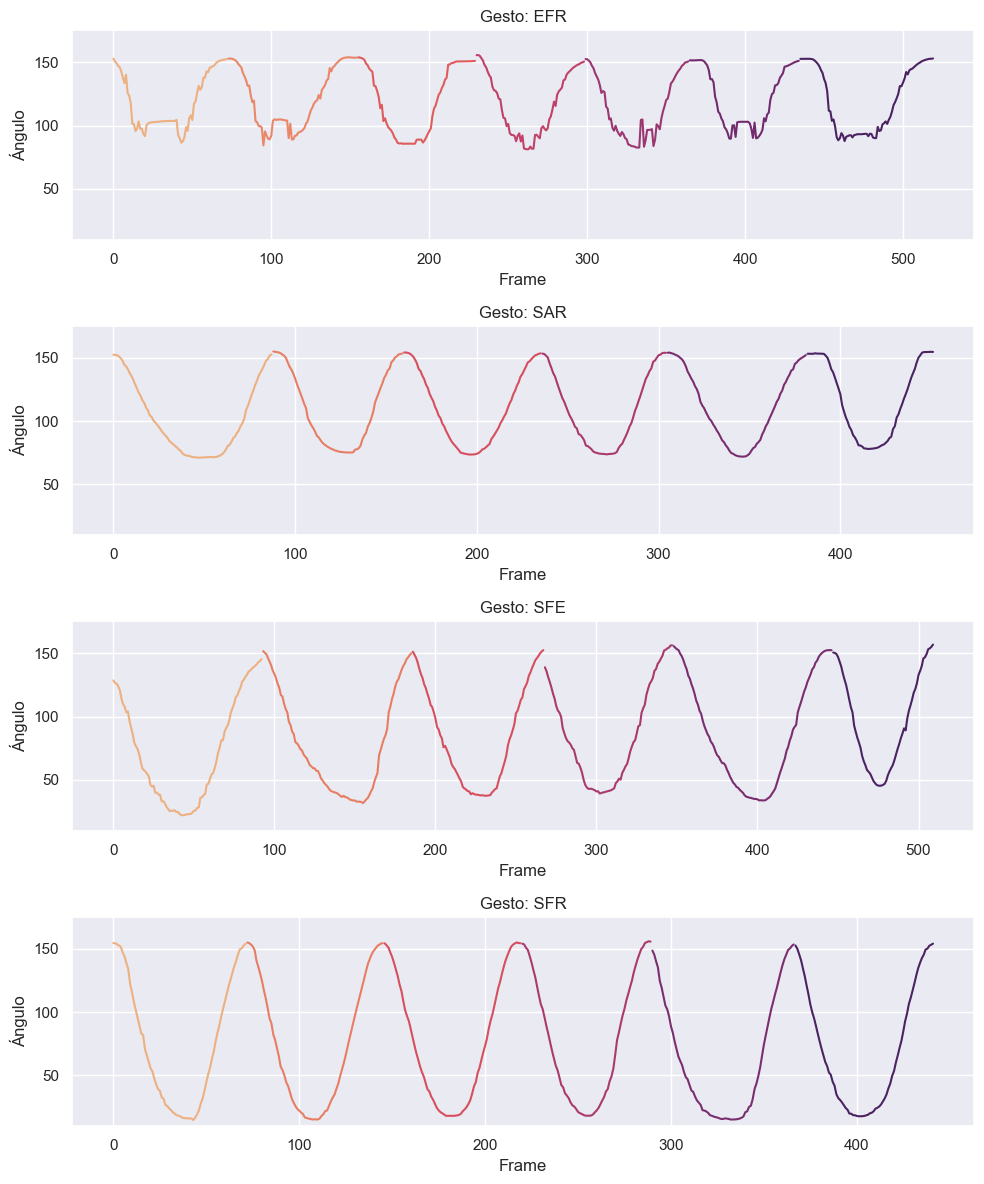

In [13]:
angle_graph(persona104_right, 'ArmsTogetherAngle')